In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr

In [2]:
effect = pd.read_csv("/home/annerer/Downloads/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Downloads/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)

effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
    
effect.columns = genes

## Get the distribution's shoulder

In [6]:
#effectCorr = effect.corr()
#effectCorr.to_csv('geneEffectCorrelation.csv')
# ONLY ONCE CALCULATED, LOAD THE MATRIX

In [10]:
effectCorr = pd.read_csv('geneEffectCorrelation.csv')

# import feather
# effectCorr.to_feather()
# effectCorr.read_feather()

In [ ]:
# import feather
# effectCorr.to_feather('effectCorr.feather')
# effectCorr.read_feather()
#effectList = effectCorr.values.tolist()
effectList = np.sort(effectList)

In [16]:
effectList = pd.DataFrame(effectList)

In [18]:
effectList.hist(bins=1000)
plt.title("Pairwise Pearson correlations of the DepMap 20Q2 Genes")
plt.xlabel("Pearson Correlation")
plt.ylabel("Number of Genes")
plt.savefig('pcc_histogram')

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>

In [235]:
effectCorr1 = effectCorr.replace(1,0)
effect2 = effectCorr1.max().sort_values(0)

In [1]:
effect2['TP53']
effectCorr1['TP53'].sort_values(0).tail()

NameError: name 'effect2' is not defined

In [246]:
cols = effectCorr.columns.to_list()
#cols = cols[0:int(np.round(0.0009*len(cols)))]
#data1 = effectCorr[cols][0:20]

bigcols = effectCorr[effectCorr[cols].sum() > 300]
#bigcols

In [255]:
#geneEffectPairs = effectCorr1.values.tolist()
#plt.histogram(geneEffectPairs,bins=10000)

In [ ]:
vals = pd.DataFrame(geneEffectPairs)
vals = vals.sort_values()
vals.hist(bins=1000)

In [224]:
fil = data1.replace(1,0)

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAED1,AAGAB
A1BG,0.000000,-0.066393,0.074915,-0.026191,0.038969,0.058261,-0.009984,0.006519,0.010926,0.008255,0.024234,-0.022386,0.019562,-0.010599,-0.032216,-0.120841
A1CF,-0.066393,0.000000,0.036498,0.002620,0.001871,-0.100850,0.017448,0.053820,-0.079545,0.033324,0.030347,0.053667,-0.063718,-0.027270,-0.007842,0.055908
A2M,0.074915,0.036498,0.000000,0.078981,0.002506,-0.052874,-0.003280,-0.048116,0.000156,0.053038,0.046693,0.125559,-0.029229,0.074561,0.038358,0.024052
A2ML1,-0.026191,0.002620,0.078981,0.000000,-0.072699,-0.014068,-0.030842,-0.040240,-0.016410,-0.016802,-0.051988,0.070277,0.056744,-0.114398,0.007850,-0.111212
A3GALT2,0.038969,0.001871,0.002506,-0.072699,0.000000,-0.026367,-0.029223,-0.044338,-0.011412,0.056682,0.023602,-0.001971,0.087212,0.021417,-0.132546,-0.021228
A4GALT,0.058261,-0.100850,-0.052874,-0.014068,-0.026367,0.000000,-0.050872,0.041942,-0.086756,0.056211,0.000856,0.034699,0.062459,-0.161870,0.014560,0.008064
A4GNT,-0.009984,0.017448,-0.003280,-0.030842,-0.029223,-0.050872,0.000000,-0.014104,0.027453,0.028530,-0.021023,0.067875,0.090880,0.036055,0.043615,0.021619
AAAS,0.006519,0.053820,-0.048116,-0.040240,-0.044338,0.041942,-0.014104,0.000000,0.066658,-0.029755,0.002035,0.058074,-0.017860,-0.108448,-0.059149,0.031853
AACS,0.010926,-0.079545,0.000156,-0.016410,-0.011412,-0.086756,0.027453,0.066658,0.000000,-0.077141,-0.048012,0.076547,-0.006271,0.060817,0.027393,-0.015891
AADAC,0.008255,0.033324,0.053038,-0.016802,0.056682,0.056211,0.028530,-0.029755,-0.077141,0.000000,0.023784,0.040022,0.018842,-0.103350,-0.038620,0.022411


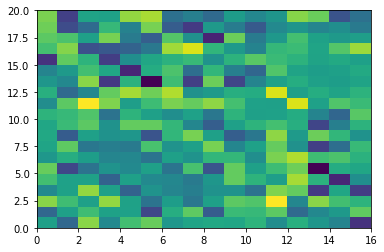

In [230]:
plt.pcolor(fil)

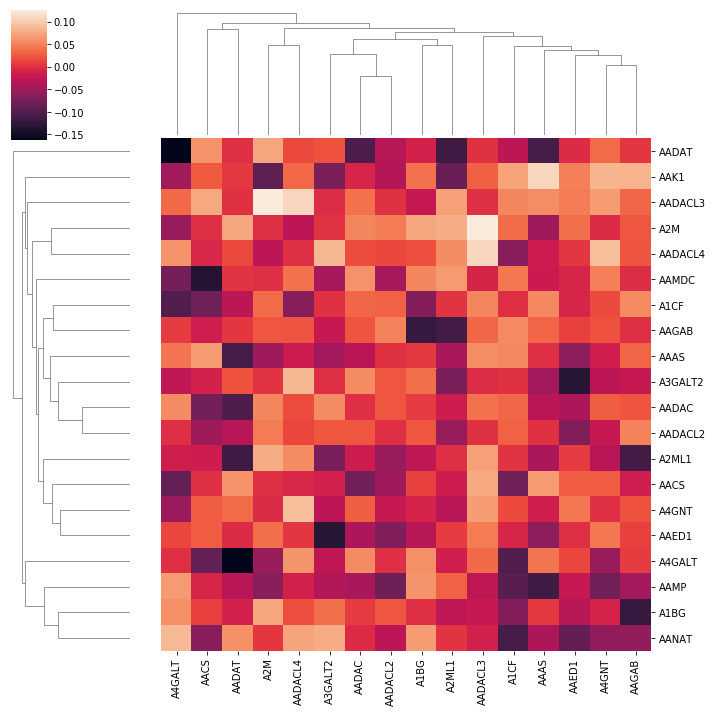

In [240]:
sns.clustermap(fil)

/home/annerer/.local/lib/python3.5/site-packages/seaborn/matrix.py:626: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


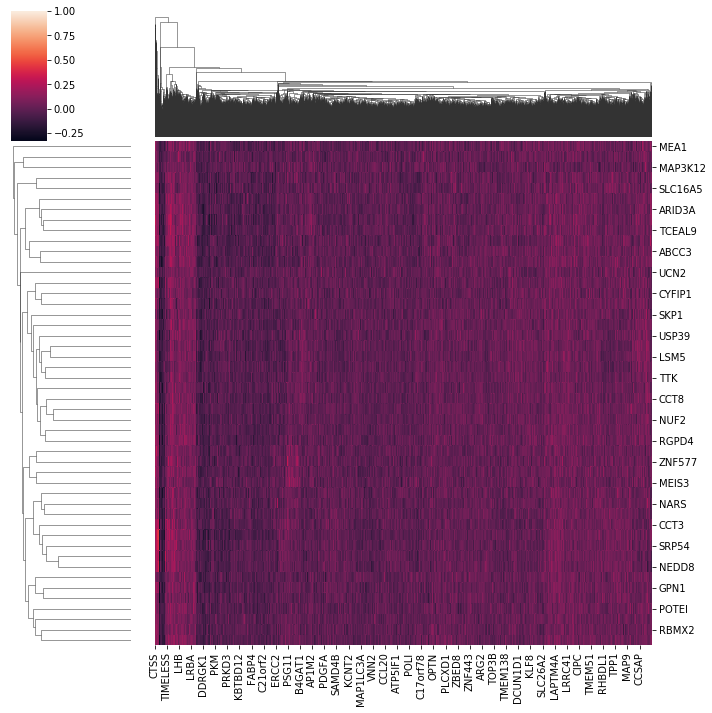

In [245]:
sns.clustermap(bigcols)

In [231]:
np.max(data1)

A1BG       1.0
A1CF       1.0
A2M        1.0
A2ML1      1.0
A3GALT2    1.0
A4GALT     1.0
A4GNT      1.0
AAAS       1.0
AACS       1.0
AADAC      1.0
AADACL2    1.0
AADACL3    1.0
AADACL4    1.0
AADAT      1.0
AAED1      1.0
AAGAB      1.0
dtype: float64

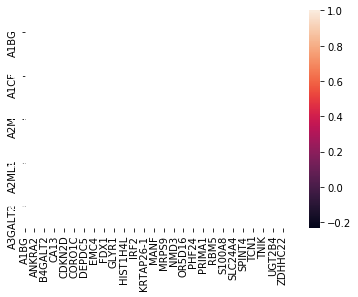

In [184]:
matrix = np.triu(effectCorr.head())
sns.heatmap(effectCorr.head(), annot=True, mask=matrix)

In [ ]:
# read the correlated effect scores file
# here I use a column from gene-effects as test-set

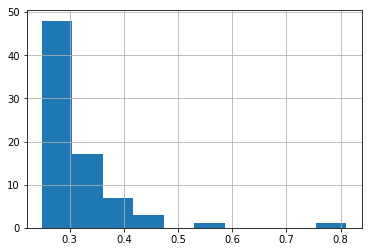

In [161]:
a = effect['A1BG (1)'].sort_values(0)
tenpercent = np.round(0.1*len(a))
start = int(len(a)-tenpercent)
a[start:769].hist()

In [175]:
def percentage_window(df,p1,p2):
    """ 
    function for getting percentage window of values (eg a shoulder)
    df..DataFrame, p1 lower percentage (eg 80), p2 upper (eg 100)
    returns the specified window of the dataframe
    """
    length = len(df)
    lower = int(np.round(p1/100 *length))
    upper = int(np.round(p2/100 *length))
    return df[lower:upper]


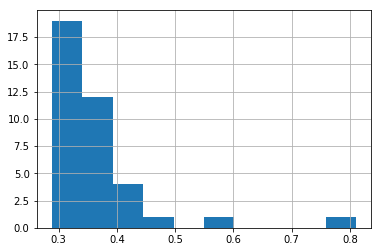

In [176]:
test = percentage_window(a,95,100)
test.hist()

# Use Cell-Lines as Index and get rid of the numbers in the column titles (Complete)

In [133]:
effect.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
INDEX,,,,,,,,,,,,,,,,,,,,,
HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513_LARGE_INTESTINE,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1_LARGE_INTESTINE,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J_URINARY_TRACT,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


In [103]:
data1 = pd.read_csv("/home/annerer/Downloads/sample_info.csv")

In [8]:
mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)

In [28]:
effect = effect.drop("DepMap_ID",1)

# Build a Search-Feature that allows to querry for Co-Dependencies

In [77]:
effect[effect['TP53'] > 3.9].index.to_list()

['NMCG1_CENTRAL_NERVOUS_SYSTEM',
 'DKMG_CENTRAL_NERVOUS_SYSTEM',
 'KMRC1_KIDNEY',
 'TTC642_SOFT_TISSUE']

In [55]:
def searcheffect(gene1, gene2, value1,value2,v3):
    if v3 == 'tolist':
        return effect[(effect[gene1] > value1) & (effect[gene2] > value2)].index.to_list()
    else:
        return effect[(effect[gene1] > value1) & (effect[gene2] > value2)]

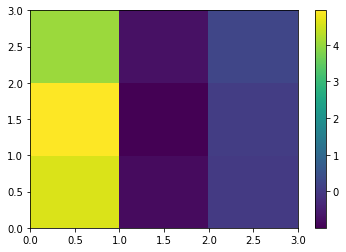

In [83]:
dat = searcheffect('TP53','MDM2', 4,-5,'tolis')
plt.pcolor(dat[['TP53','MDM2','A1BG']])
plt.colorbar()

So far this allows to querry for two genes of interest
outputting a heatmap for the essentialities with rows
being cell lines and columns the genes.
in this example above we see that TP53 and MDM2 are 
negatively correlated. We see this as well in our pre-
liminary calculation of (pearson) correlation between
the gene-effects of these two genes in the 700+ cancer
cell lines.

### TODO:

the gene pairs have to be input by the user, this is fine.
the default values for val1, val2 should be higher or lower 
than average or something. I have to wait to see what the matrix
actually is. 
output should be the heatmap or the list of tissues that are affected.
Then we could check if these are oncogene-addictions or synthetic lethalities.

How? get the genetic data from the depmap linked sites like cellosaur or cosmid. depmap should also have this data. this does not have to be an elaborate visual display, this could be a quick check i guess.

## Renaming columns (complete)

In [ ]:
gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])

In [100]:
lineages = list(set(data['lineage']))

In [132]:
#effect.index.to_list()

In [72]:
effect.columns = genes

In [70]:
effect.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
INDEX,,,,,,,,,,,,,,,,,,,,,
HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513_LARGE_INTESTINE,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1_LARGE_INTESTINE,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J_URINARY_TRACT,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


## THE GOAL IS TO HAVE A HIERARCHICAL INDEX THAT CORRESPONDS TO THE TISSUE (TODO)

some steps have been taken. i have a dict with matching tissue/cell-types. I have no idea at the moment how to convert this into a multi-index without messing things up.


In [ ]:
    
'''
pseudocode:

for x in sample-lines:
 dict[sample-lines].append(sample-ccle-names)

this can be done from the sample dataframe alone.
you just take all the names with the same lineage in a dict
'''
lineDict = {}
ovary = data1[data1['lineage'] == 'ovary']['CCLE_Name']


for i in lineages:
    lineDict[i] = data1[data1['lineage'] == i]['CCLE_Name']

In [ ]:
list1 = list(lineDict.keys()),
list2 = list(lineDict.values())
list3 = [list1,list2]

In [ ]:
tuples = list(zip(*list3))

In [ ]:
#index = pd.MultiIndex.from_tuples(tuples, names=['tissue', 'cell_lines'])